In [2]:
import kagglehub 

path1 = kagglehub.dataset_download("hunter0007/ecommerce-dataset-for-predictive-marketing-2023")
path2= kagglehub.dataset_download("apoorvaappz/global-super-store-dataset")
print("Path to dataset files for E-Commerce:", path1)
print("Path to dataset files for Global Super Store Dataset:", path2)

c:\Users\dgped\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files for E-Commerce: C:\Users\dgped\.cache\kagglehub\datasets\hunter0007\ecommerce-dataset-for-predictive-marketing-2023\versions\1
Path to dataset files for Global Super Store Dataset: C:\Users\dgped\.cache\kagglehub\datasets\apoorvaappz\global-super-store-dataset\versions\2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df1 = pd.read_csv(os.path.join(path1, "ECommerce_consumer behaviour.csv"), encoding="latin1")
df2 = pd.read_csv(os.path.join(path2, "Global_Superstore2.csv"), encoding="latin1")

## Basic Exploration

### E Commerce Consumer Behavior

In [5]:
print("Shape:", df1.shape)

print("\nFirst 5 rows:")
print(df1.head())

print("\n--- Data Types ---")
print(df1.dtypes)

print("\n--- Null Counts ---")
print(df1.isna().sum())

print("\n--- Summary (Numeric) ---")
print(df1.describe())

print("\n--- Summary (Categorical) ---")
print(df1.describe(include="O"))

Shape: (2019501, 12)

First 5 rows:
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   2425083    49125             1          2                 18   
2   2425083    49125             1          2                 18   
3   2425083    49125             1          2                 18   
4   2425083    49125             1          2                 18   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN          17                  1          0   
1                     NaN          91                  2          0   
2                     NaN          36                  3          0   
3                     NaN          83                  4          0   
4                     NaN          83                  5          0   

   department_id  department        product_name  
0             13      pantry  baking ingredients  
1             16  dairy eg

### Unique Values

In [6]:
for col in df1.select_dtypes(include="object").columns:  
    print(f"{col}: {df1[col].nunique()} unique values")


department: 21 unique values
product_name: 134 unique values


### Distributions of Numerical Features

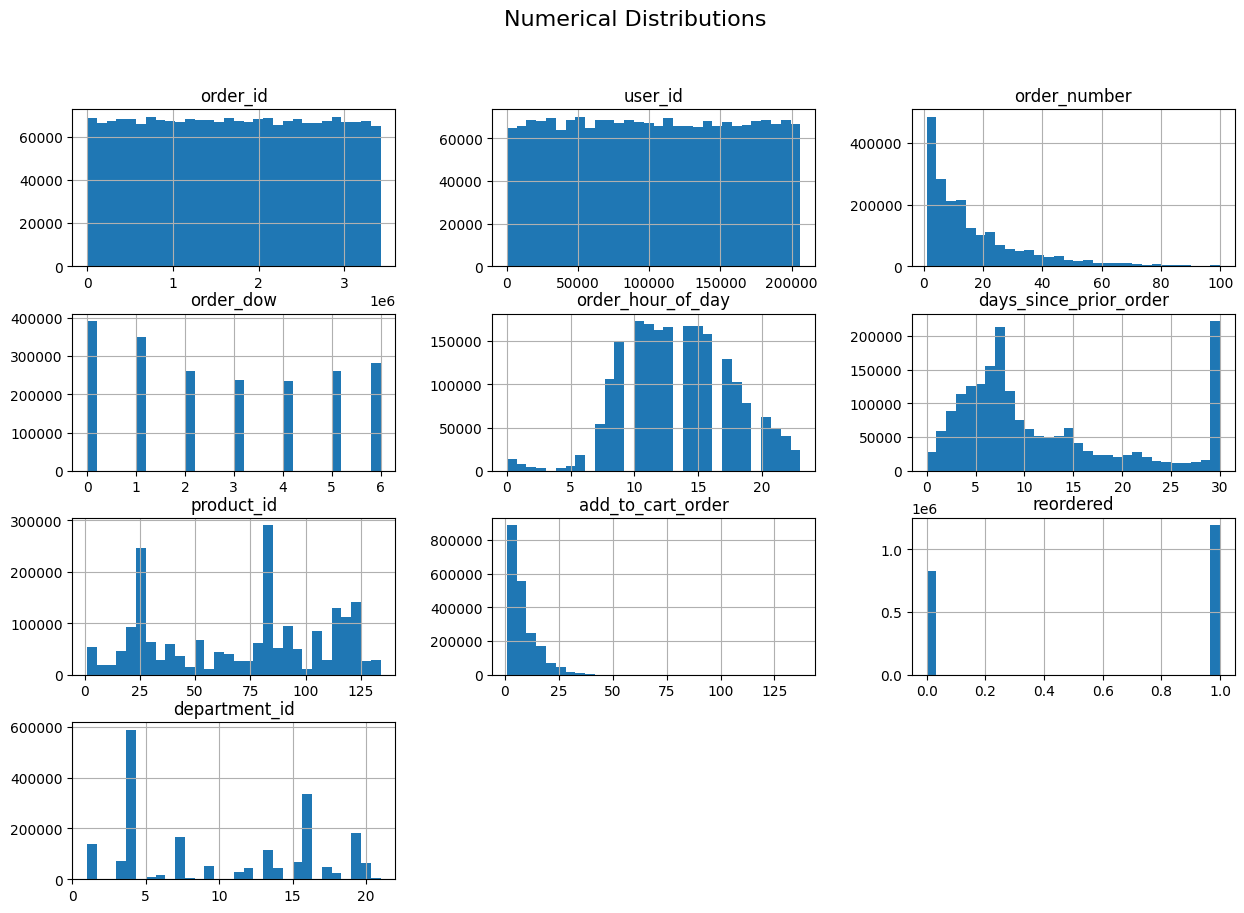

In [7]:
num_cols1 = df1.select_dtypes(include=[np.number]).columns
df1[num_cols1].hist(bins=30, figsize=(15,10))
plt.suptitle("Numerical Distributions", fontsize=16)
plt.show()

### Missing Values

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64


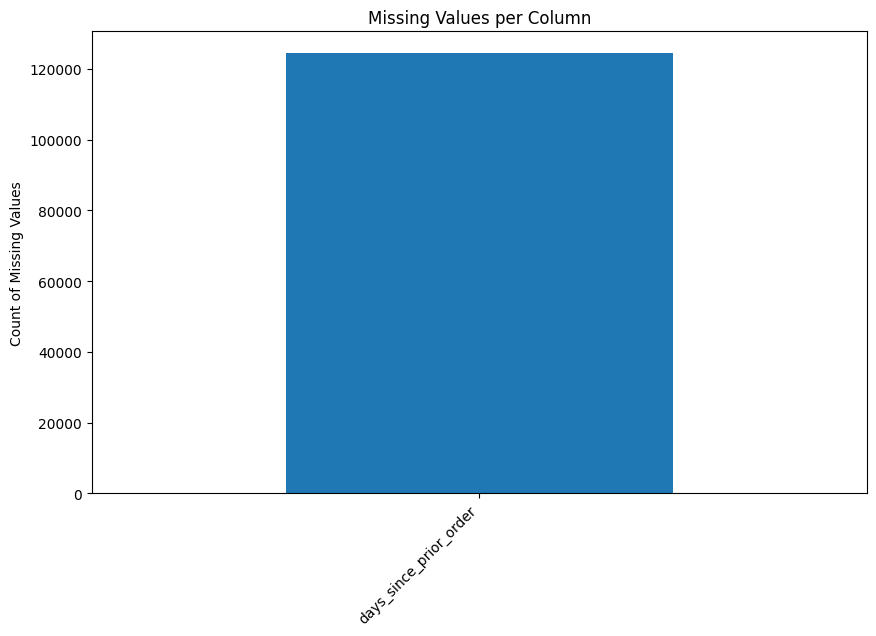

In [8]:
missing1 = df1.isna().sum()
print(missing1)
missing1 = missing1[missing1 > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
missing1.plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45, ha="right")
plt.show()

### Correlation Heatmap

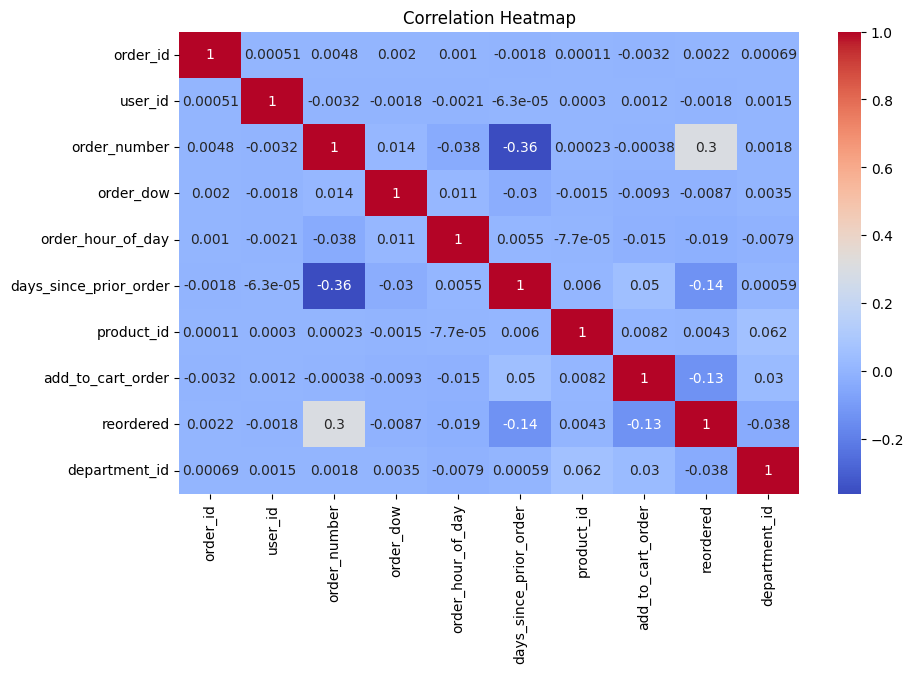

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df1[num_cols1].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Categorical Exploration

In [10]:
if "Category" in df1.columns:
    plt.figure(figsize=(8,5))
    df1.groupby("Category")["Sales"].sum().sort_values().plot(kind="barh")
    plt.title("Sales by Category")
    plt.show()


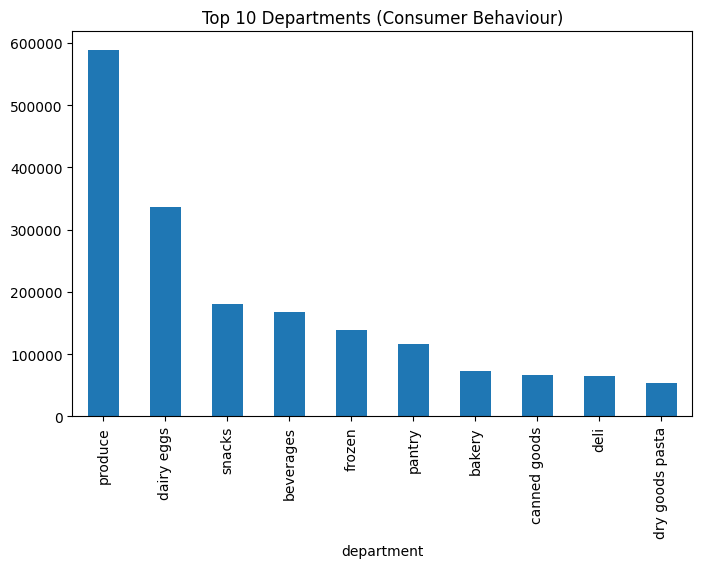

In [11]:

if "department" in df1.columns:
    plt.figure(figsize=(8,5))
    df1["department"].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 Departments (Consumer Behaviour)")
    plt.show()

### Time-Based Analysis

In [20]:
if "Order Date" in df1.columns:
    df1["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce", dayfirst=True)
    monthly_sales = df1.groupby(df1["Order Date"].dt.to_period("M"))["Sales"].sum()
    monthly_sales.plot(figsize=(12,5))
    plt.title("Monthly Sales Trend")
    plt.ylabel("Total Sales")
    plt.show()

## Global Super Store 

In [12]:
print("Shape:", df2.shape)

print("\nFirst 5 rows:")
print(df2.head())

print("\n--- Data Types ---")
print(df2.dtypes)

print("\n--- Null Counts ---")
print(df2.isna().sum())

print("\n--- Summary (Numeric) ---")
print(df2.describe())

print("\n--- Summary (Categorical) ---")
print(df2.describe(include="O"))

Shape: (51290, 24)

First 5 rows:
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  

### Unique Values

In [13]:
for col in df2.select_dtypes(include="object").columns:  
    print(f"{col}: {df2[col].nunique()} unique values")


Order ID: 25035 unique values
Order Date: 1430 unique values
Ship Date: 1464 unique values
Ship Mode: 4 unique values
Customer ID: 1590 unique values
Customer Name: 795 unique values
Segment: 3 unique values
City: 3636 unique values
State: 1094 unique values
Country: 147 unique values
Market: 7 unique values
Region: 13 unique values
Product ID: 10292 unique values
Category: 3 unique values
Sub-Category: 17 unique values
Product Name: 3788 unique values
Order Priority: 4 unique values


### Distribution of Numerical Features

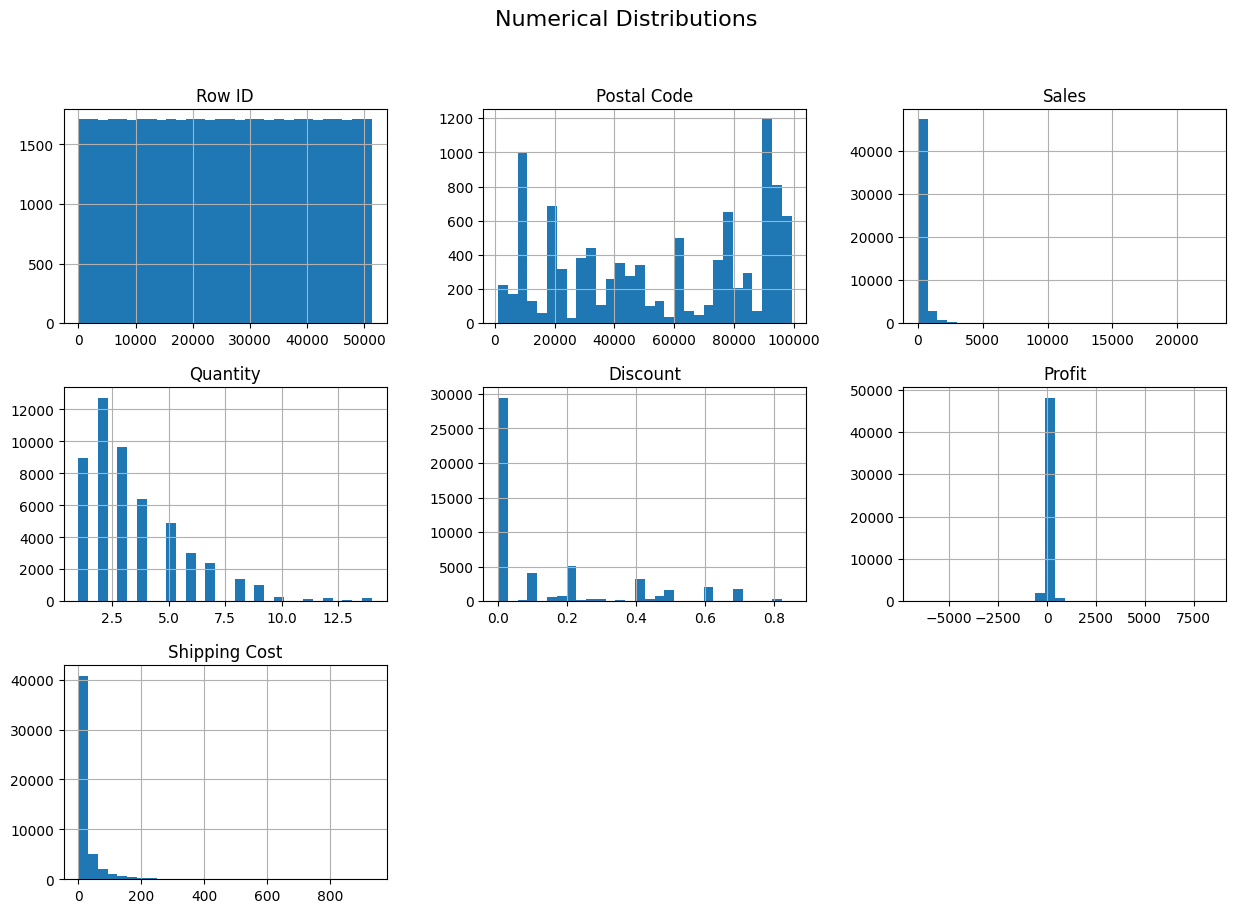

In [14]:
num_cols2 = df2.select_dtypes(include=[np.number]).columns
df2[num_cols2].hist(bins=30, figsize=(15,10))
plt.suptitle("Numerical Distributions", fontsize=16)
plt.show()

### Missing Values

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


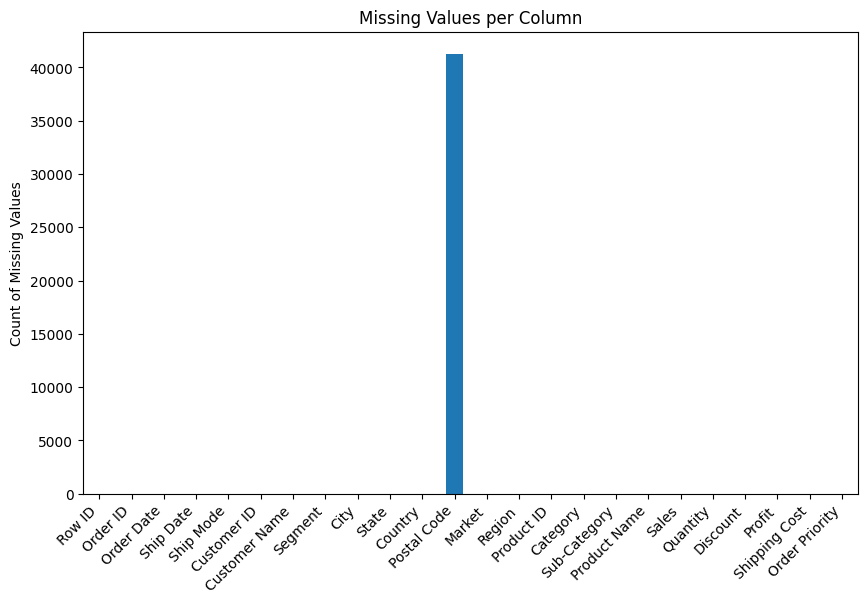

In [15]:
missing2 = df2.isna().sum()
print(missing2)
missing = missing2[missing2 > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
missing2.plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45, ha="right")
plt.show()

### Correlation Heatmap

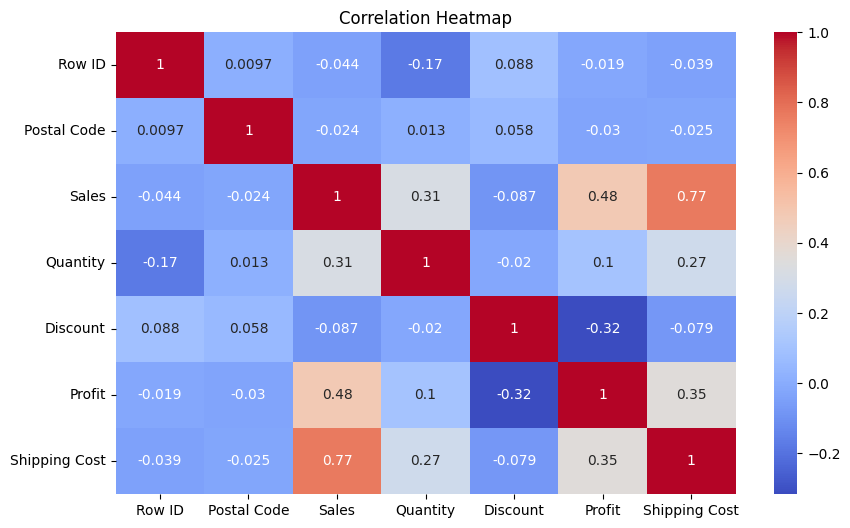

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df2[num_cols2].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Categorical Exploration

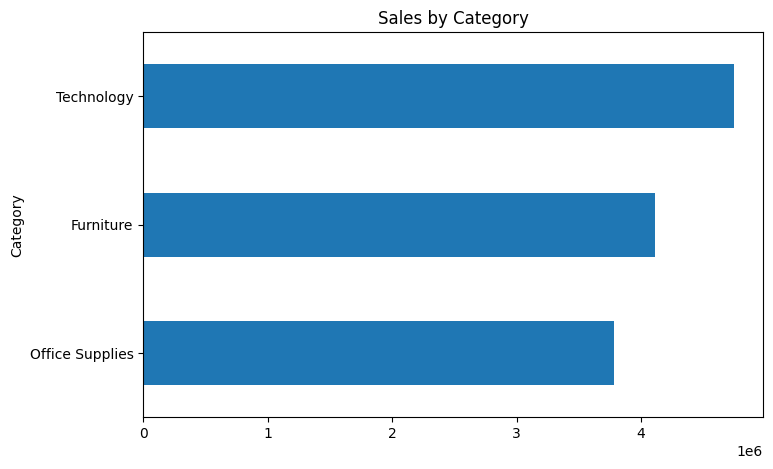

In [17]:
if "Category" in df2.columns:
    plt.figure(figsize=(8,5))
    df2.groupby("Category")["Sales"].sum().sort_values().plot(kind="barh")
    plt.title("Sales by Category")
    plt.show()

In [18]:

if "department" in df2.columns:
    plt.figure(figsize=(8,5))
    df2["department"].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 Departments (Consumer Behaviour)")
    plt.show()

### Time-Based Analysis

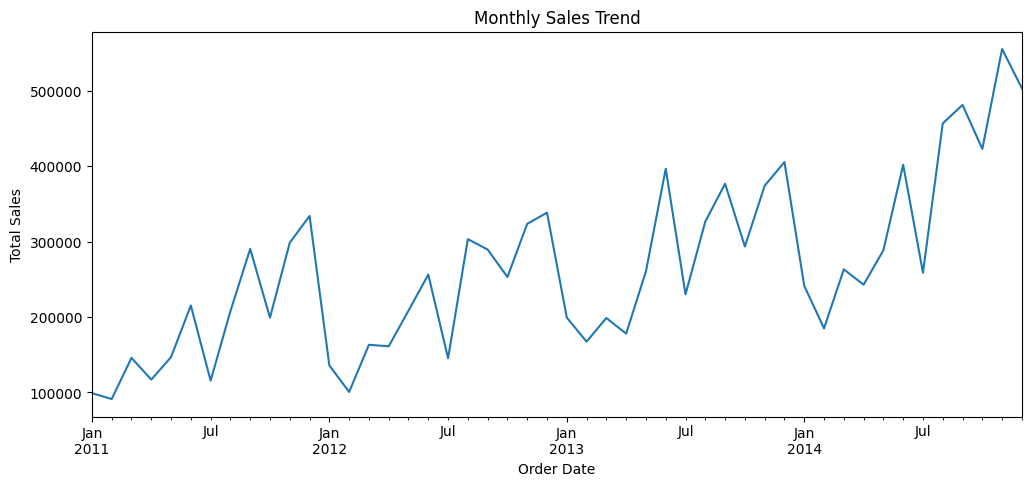

In [19]:
if "Order Date" in df2.columns:
    df2["Order Date"] = pd.to_datetime(df2["Order Date"], errors="coerce", dayfirst=True)
    monthly_sales = df2.groupby(df2["Order Date"].dt.to_period("M"))["Sales"].sum()
    monthly_sales.plot(figsize=(12,5))
    plt.title("Monthly Sales Trend")
    plt.ylabel("Total Sales")
    plt.show()